Notebook to generate tables to be used in the model pipeline

In [216]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

from CMP_functions.preprocessing import *

In [2]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print (key, value) 

In [19]:
CountFrequency(list(df[ft]))

Haematopoietic and Lymphoid 122
Head and Neck 24
Liver 8
Thyroid 11
Bone 26
Breast 57
Stomach 23
Lung 150
Ovary 40
Prostate 8
Large Intestine 42
Central Nervous System 37
Kidney 23
Soft Tissue 12
Skin 41
Peripheral Nervous System 27
Esophagus 22
Cervix 12
Biliary Tract 2
Pancreas 23
Bladder 11
Endometrium 6
Vulva 3
Testis 3
Adrenal Gland 1
Uterus 1
Placenta 1


In [247]:
table = '../data/images_info_table.csv'

ft = 'tissue'
split_on = 'Lung'

name = split_on

In [248]:
df = pd.read_csv(table)

In [249]:
# df

In [250]:
# df.columns

In [251]:
#set(df[ft])

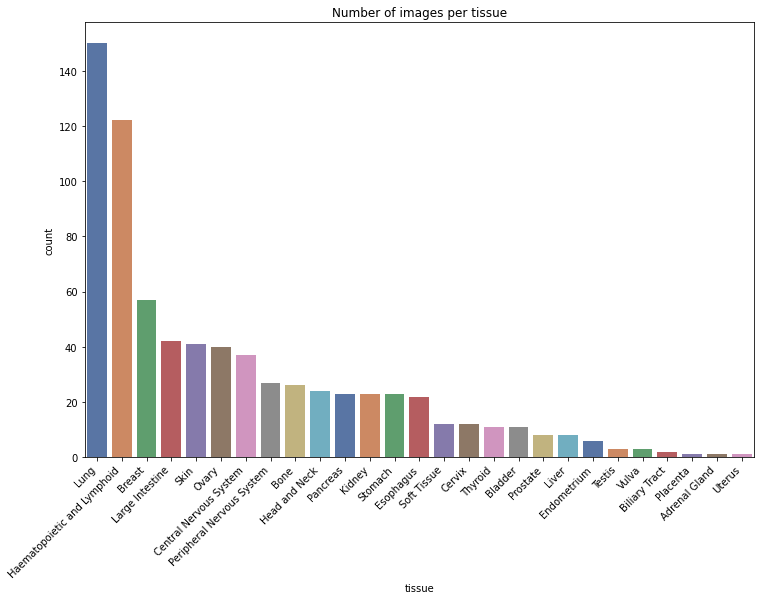

In [252]:
plot_ft_many(df, ft)

In [253]:
df['ft'] = np.where(df[ft]==split_on, split_on, 'Not_'+split_on)

In [254]:
# df

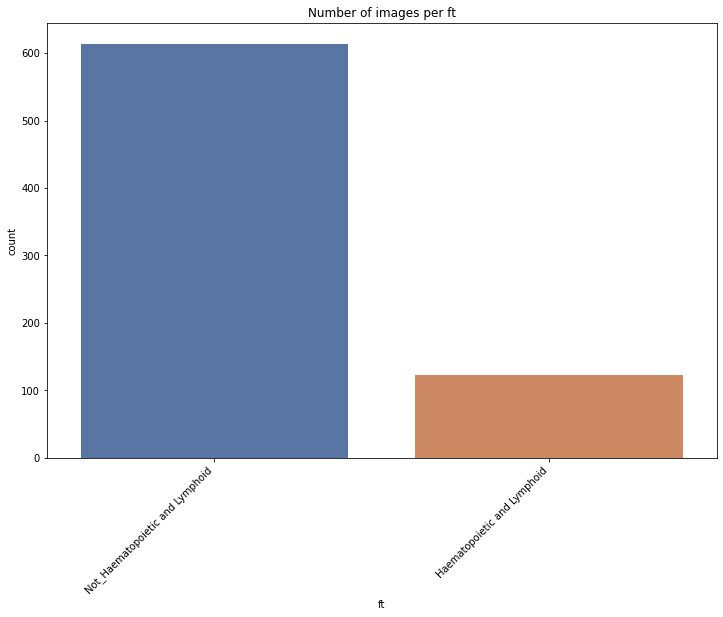

In [255]:
plot_ft_many(df, 'ft')

In [256]:
train_size = 1000
valid_size = 200

cl1 = len(df[df.ft==split_on])
cl0 = len(df[df.ft==f'Not_{split_on}'])
         
cl1_tr = int((cl1 / 5) * 4)
cl0_tr = int((cl0 / 5) * 4)
cl1_va = int(cl1 / 5)
cl0_va = int(cl0 / 5)
                        
cl1_tr_au = train_size - cl1_tr
cl0_tr_au = train_size - cl0_tr
cl1_va_au = valid_size - cl1_va
cl0_va_au = valid_size - cl0_va       
             
print (cl1_tr)
print (cl0_tr)
print (cl1_va)
print (cl0_va)
print()
print (cl1_tr_au )
print (cl0_tr_au )
print (cl1_va_au )
print (cl0_va_au )    

97
491
24
122

903
509
176
78


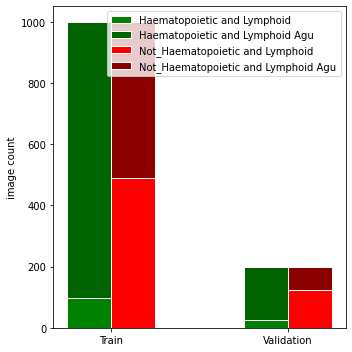

In [257]:
### ALL

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [cl1_tr_au, cl1_va_au]
agu_bars2 = [cl0_tr_au, cl0_va_au]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_train_test_agumented.jpg', dpi=150)

# Create legend & Show graphic
plt.show()

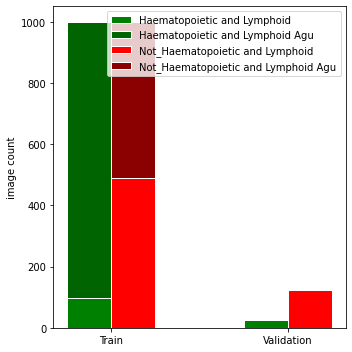

In [258]:
### ONLY TRAIN

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [cl1_tr_au, 0]
agu_bars2 = [cl0_tr_au, 0]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_only_train_agumented.jpg', dpi=150)

# Create legend & Show graphic
plt.show()

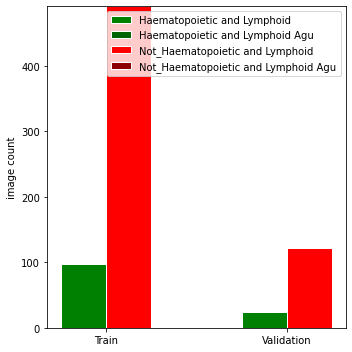

In [259]:
### NO AGU

barWidth = 0.25

bars1 = [cl1_tr, cl1_va]
bars2 = [cl0_tr, cl0_va]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

agu_bars1 = [0, 0]
agu_bars2 = [0, 0]

ragu1 = [0,1]
ragu2 = [barWidth, 1+barWidth]
bot1 = [cl1_tr, cl1_va]
bot2 = [cl0_tr, cl0_va]

# Make the plot
plt.figure(figsize=(5,5))

plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='w', label= split_on)
plt.bar(ragu1, agu_bars1, bottom=bot1, color='darkgreen', edgecolor='w', width=barWidth, label=f'{split_on} Agu')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='w', label=f'Not_{split_on}')
plt.bar(ragu2, agu_bars2, bottom=bot2, color='darkred', edgecolor='w', width=barWidth, label=f'Not_{split_on} Agu')

plt.ylabel("image count")
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Train', 'Validation'])
plt.legend()
plt.tight_layout()

plt.savefig(f'{name}_no_agumentation.jpg', dpi=150)

# Create legend & Show graphic
plt.show()

In [260]:
new_df =  df[['im_id','ft']]

In [214]:
new_df

,im_id,ft
0,1877-8278,Not_Pancreas
1,1476-8001,Not_Pancreas
2,1068-8758,Not_Pancreas
3,2195-8403,Not_Pancreas
4,162,Not_Pancreas
...,...,...
731,706-9149,Not_Pancreas
732,153,Not_Pancreas
733,1875-8232,Not_Pancreas
734,2138-8023,Not_Pancreas


In [215]:
new_df.to_csv(name+'_table.csv', index=False)